In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd
import pathlib
from glob import glob
from scipy import stats
import math
from skimage.feature import graycomatrix, graycoprops
import cv2
import seaborn as sns
%matplotlib notebook
%matplotlib inline 

In [ ]:
# image + filtre de bande differente, 
# regarder en moyenne 

In [2]:
#1
nbit=8
L=2**nbit
def probabilities(hist, nbre_pixel_image):
    prob=[card_B/nbre_pixel_image for card_B in hist]
    return prob
    
#2
def expectation(prob, levels):
    e=0
    for i in range(L-1):
        e+=prob[i]*levels[i]
    return e
    
#3
def variance(e, prob):
    var=0
    for i in range(L-1):
        var+=prob[i]*(i-e)**2
    return var

#4
def asymetry(e, prob):
    asy=0
    for i in range(L-1):
        asy+=prob[i]*(i-e)**3
    return asy

#5
def entropy(prob):
    entropy=0
    for i in range(L-1):
        if prob[i]>0:
            entropy+=prob[i]*math.log2(prob[i])
    return -1*entropy

#6
def excess(e, prob):
    excess=0
    for i in range(L-1):
        excess+=prob[i]*(i-e)**4
    return excess

#7
def homogeneity(prob):
    homo=0
    for i in range(L-1):
        homo+=prob[i]**2
    return homo

#8
def skewness(variance, asymetry):
    sigma=np.sqrt(variance)
    skew=asymetry/sigma**3
    return skew

#9
def kurtosis(var, excess):
    return excess/(var**2)  

In [3]:
#                                     Second-order statistics

In [4]:
def GLCM(image):
    glcm=graycomatrix(image, distances=[1], 
                     angles=[0, np.pi/4], levels=256,
                    symmetric=True, normed=True)
    glcm_mean=glcm.mean(axis=3)
    GLCM=glcm_mean.reshape(256, 256, 1,1)
    return GLCM

In [5]:
# definition of the repository 
direct_plane='E:\\AI\\Machine_Learning\\Image-classification\\Emotion_recognition\\dataset\\planes'
direct_car='E:\\AI\\Machine_Learning\\Image-classification\\Emotion_recognition\\dataset\\cars'
direct_train='E:\\AI\\Machine_Learning\\Image-classification\\Emotion_recognition\\dataset\\trains'

data1={'expectations':[], 'variance':[], 'asymetry':[], 'entropy':[], 
      'excess':[], 'homogeneity1':[], 'skewness':[], 'kurtosis':[], 'contrast':[],
     'correlation':[], 'homogeneity2':[], 'energy':[], 'dissimilarity':[], 'ASM':[]}
data2={'expectations':[], 'variance':[], 'asymetry':[], 'entropy':[], 
      'excess':[], 'homogeneity1':[], 'skewness':[], 'kurtosis':[], 'contrast':[],
     'correlation':[], 'homogeneity2':[], 'energy':[], 'dissimilarity':[], 'ASM':[]}
data3={'expectations':[], 'variance':[], 'asymetry':[], 'entropy':[], 
      'excess':[], 'homogeneity1':[], 'skewness':[], 'kurtosis':[], 'contrast':[],
     'correlation':[], 'homogeneity2':[], 'energy':[], 'dissimilarity':[], 'ASM':[]}

In [6]:
#Extraction function of the statistical properties 
def lonz_nematode(directory, data):
    for file in glob(os.path.join(directory, '*.jpg')):
        image=cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        image=cv2.resize(image, (300, 300))
        x_len, y_len=image.shape
        hist, levels=np.histogram(image.ravel(), bins=255, range=[0, 255])
        nbre_pixel_image=x_len*y_len
        probability=probabilities(hist, nbre_pixel_image)
        expect=expectation(probability, levels)
        data["expectations"].append(expect)
        var=variance(expect, probability)
        data["variance"].append(var)
        asym=asymetry(expect, probability)
        data["asymetry"].append(asym)
        entrpy=entropy(probability)
        data["entropy"].append(entrpy)
        excs=excess(expect, probability)
        data["excess"].append(excs)
        homo1=homogeneity(probability)
        data["homogeneity1"].append(homo1)
        skew=skewness(var, asym)
        data["skewness"].append(skew)
        kurt=kurtosis(var, excs)
        data["kurtosis"].append(kurt)
        glcm=GLCM(image)
        contrast=graycoprops(glcm, 'contrast')
        data["contrast"].append(contrast[0][0])
        correlation=graycoprops(glcm, 'correlation')
        data["correlation"].append(correlation[0][0])
        homogeneity2=graycoprops(glcm, 'homogeneity')
        data["homogeneity2"].append(homogeneity2[0][0])
        energy=graycoprops(glcm, 'energy')
        data["energy"].append(energy[0][0])
        dissimilarity=graycoprops(glcm, 'dissimilarity')
        data["dissimilarity"].append(dissimilarity[0][0])
        ASM=graycoprops(glcm, 'ASM')
        data['ASM'].append(ASM[0][0])
    return data

In [7]:
data_plane=lonz_nematode(direct_plane, data1)
plane=pd.DataFrame(data_plane)

data_car=lonz_nematode(direct_car, data2)
car=pd.DataFrame(data_car)
data_train=lonz_nematode(direct_train, data3)
train=pd.DataFrame(data_train)
variables=list(plane.columns)


In [8]:
# Variable normalization  
def normalize_function(data):
    data_normalized=data.copy()
    for var in list(data_normalized.columns):
        var_min=data_normalized[var].min()
        var_max=data_normalized[var].max()
        data_normalized[var]=(data_normalized[var]-var_min)/var_max
    return data_normalized

In [9]:
plane_plane=normalize_function(plane)
car_car=normalize_function(car)
train_train=normalize_function(train)

In [89]:
train_train.size

6000

In [ ]:
# le temps de calcul, mutiplier l'image par la function sinus et cosinus les vecteur de la base 

In [10]:
plane_zeros=[]
for i in range(plane_plane.shape[0]):
    plane_zeros.append(0)
plane_plane["car_plane_train"]=plane_zeros

cars_ones=[]
for i in range(car_car.shape[0]):
    cars_ones.append(1)
car_car["car_plane_train"]=cars_ones

train_threes=[]
for i in range(train_train.shape[0]):
    train_threes.append(2)
train_train["car_plane_train"]=train_threes

In [11]:
car_plane_train_data=pd.concat([plane_plane, car_car, train_train], axis=0).sample(frac=1).reset_index(drop=True)

In [12]:
car_plane_train_data.to_csv(" car_plane_train_data.csv")

In [90]:
car_plane_train_data.size 

18000

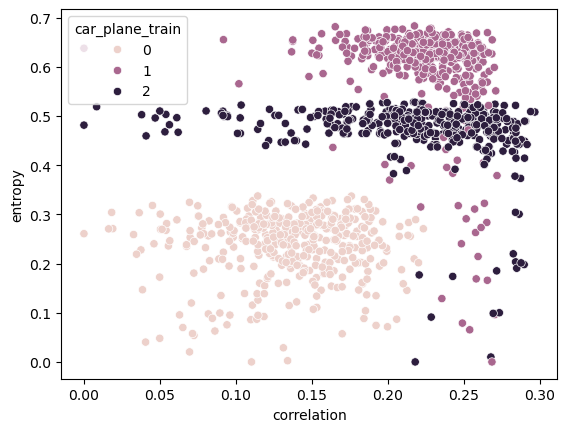

In [13]:
sns.scatterplot(x=car_plane_train_data["correlation"], y= car_plane_train_data["entropy"], 
                hue=car_plane_train_data["car_plane_train"])
plt.show()

In [14]:
car_plane_train_data.columns

Index(['expectations', 'variance', 'asymetry', 'entropy', 'excess',
       'homogeneity1', 'skewness', 'kurtosis', 'contrast', 'correlation',
       'homogeneity2', 'energy', 'dissimilarity', 'ASM', 'car_plane_train'],
      dtype='object')

In [63]:
#                            distributions with seaborn

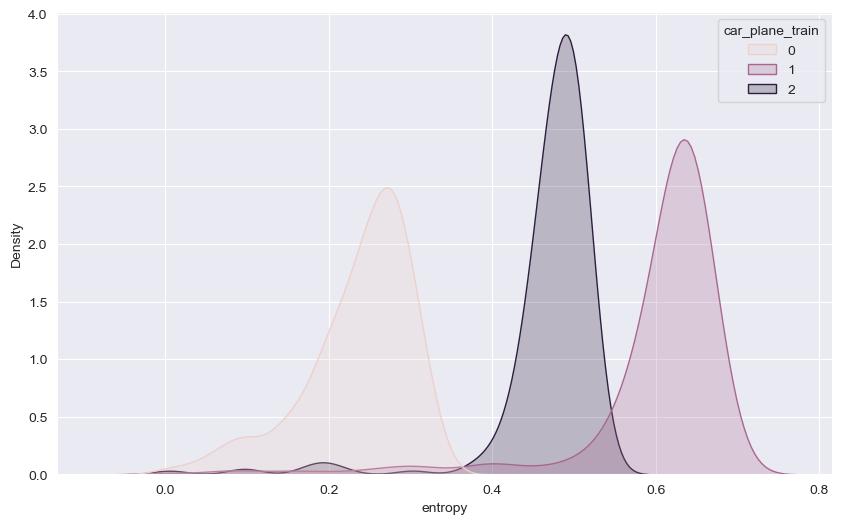

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.kdeplot(data=car_plane_train_data, x="entropy", 
             hue="car_plane_train", fill=True)
plt.show()

In [17]:
variables=car_plane_train_data.columns

In [79]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

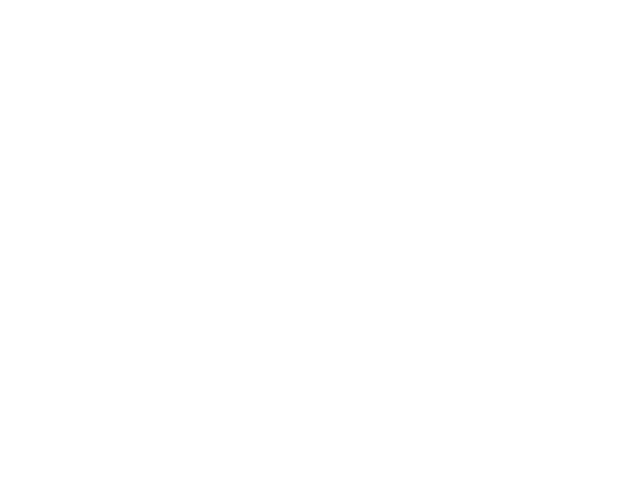

In [85]:
#1------symetry+entropy+correlation
#2------entropy + excess+ correlation
%matplotlib widget 
fig = plt.figure()
ax=Axes3D(fig)
my_plot = ax.scatter(car_plane_train_data["correlation"], car_plane_train_data["entropy"], 
                   car_plane_train_data["kurtosis"], c=car_plane_train_data["car_plane_train"])
plt.show()

In [76]:
numeric_col=car_plane_train_data.select_dtypes(include=['number'])
cov_matric=numeric_col.corr()
print(cov_matric)

                 expectations  variance  asymetry   entropy    excess  \
expectations         1.000000  0.352554 -0.667835  0.038949  0.263928   
variance             0.352554  1.000000 -0.091733  0.083715  0.823768   
asymetry            -0.667835 -0.091733  1.000000  0.493826 -0.182453   
entropy              0.038949  0.083715  0.493826  1.000000 -0.264967   
excess               0.263928  0.823768 -0.182453 -0.264967  1.000000   
homogeneity1         0.343889  0.200725 -0.430301 -0.535700  0.445276   
skewness            -0.672245 -0.069548  0.894323  0.506840 -0.147421   
kurtosis            -0.224658 -0.569720  0.125906 -0.175073 -0.195900   
contrast            -0.156320  0.172149  0.068476 -0.092960  0.228862   
correlation          0.207395  0.342870  0.284321  0.533436  0.140662   
homogeneity2         0.298109  0.203805 -0.244870 -0.257113  0.290579   
energy               0.383686  0.359109 -0.322355 -0.370424  0.531214   
dissimilarity       -0.213946  0.067734  0.115245 -

In [69]:
#                                  import necessary packages and modules

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV, KFold, learning_curve, cross_val_score, validation_curve
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

In [78]:
variables

Index(['expectations', 'variance', 'asymetry', 'entropy', 'excess',
       'homogeneity1', 'skewness', 'kurtosis', 'contrast', 'correlation',
       'homogeneity2', 'energy', 'dissimilarity', 'ASM', 'car_plane_train'],
      dtype='object')

In [79]:
y=car_plane_train_data["car_plane_train"]
X=car_plane_train_data.drop("car_plane_train", axis=1)
x_train, x_test, y_train, y_test=train_test_split(X, y, shuffle=True, test_size=0.2, random_state=0)

#
 #                                       Model 1: KNeighborsClassifier
#

In [ ]:
# choice of best parameters 

In [69]:
model1=KNeighborsClassifier()

model1_params={"n_neighbors":np.arange(1, 20),
        "weights":["uniform", "distance"], 
        "algorithm":["ball_tree", "kd_tree"], 
        "leaf_size": np.arange(10, 20), 
        "metric":["euclidean", "manhattan", "minkowski"]}

cv=StratifiedKFold(5)

In [70]:
model1_grid=GridSearchCV(model1, param_grid=model1_params, cv=cv, scoring='accuracy')

In [71]:
model1_grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [72]:
model1_grid.score

<bound method BaseSearchCV.score of GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')>

In [73]:
model1_grid.best_score_

0.9680555555555556

In [74]:
best_model1=model1_grid.best_estimator_

In [ ]:
best_mode1

In [75]:
best_model1.score(x_train, y_train)

1.0

In [76]:
n, train_score, val_score= learning_curve(best_model1, x_train, y_train, cv=cv, train_sizes=np.linspace(0.8, 1.0, 20))

In [78]:
predictions=best_model1.predict(x_train)

In [81]:
best_model1.score(x_test, y_test)

0.9625

[460 466 472 478 485 491 497 503 509 515 521 527 533 539 545 551 557 563
 569 576]


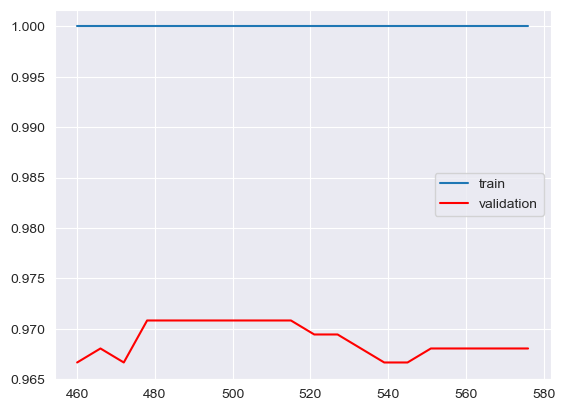

In [77]:
print(n)
plt.plot(n, train_score.mean(axis=1), label="train")
plt.plot(n, val_score.mean(axis=1), label="validation", c='red')
plt.legend()
plt.show()

In [121]:
predictions1=best_model1.predict(x_train)
confusion_matrix(y_train, predictions1)

array([[253,   0,   0],
       [  0, 232,   0],
       [  0,   0, 235]], dtype=int64)

In [127]:
predictions11=best_model1.predict(x_test)
confusion_matrix(y_test, predictions11)

array([[146,   0,   1],
       [  2, 161,   5],
       [  4,   6, 155]], dtype=int64)

In [95]:
import joblib

In [96]:
joblib.dump(best_model1, 'model1.pkl') 

['model1.pkl']

In [98]:

model1_loaded= joblib.load('model1.pkl')


In [103]:
model1_loaded.score(x_test, y_test)

0.9625

#
 #                                       Model 3: RandomForestClassifier
#

In [110]:
model2=RandomForestClassifier()

model2_params={"n_estimators":np.arange(3, 50),
        "criterion":["gini", "entropy", "log_loss"], 
        "min_samples_split":np.arange(2, 50), 
        "max_features":["sqrt", "log2"],
        "class_weight":["balanced", "balanced_subsample"]        
       }

cv2=StratifiedKFold(5)

In [111]:
model2_grid=GridSearchCV(model2, param_grid=model2_params, cv=cv2, scoring='accuracy')

In [112]:
model2_grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_estimators': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy')

In [113]:
model2_grid.score

<bound method BaseSearchCV.score of GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_estimators': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy')>

In [114]:
model2_grid.best_score_

0.9958333333333333

In [115]:
best_model2=model2_grid.best_estimator_

In [117]:
best_model2.score(x_train, y_train)

0.9972222222222222

In [ ]:
n2, train_score2, val_score2= learning_curve(best_model2, x_train, y_train, cv=cv, train_sizes=np.linspace(0.8, 1.0, 20))

In [119]:
predictions2=best_model2.predict(x_train)
best_model2.score(x_test, y_test)

0.9729166666666667

[460 466 472 478 485 491 497 503 509 515 521 527 533 539 545 551 557 563
 569 576]


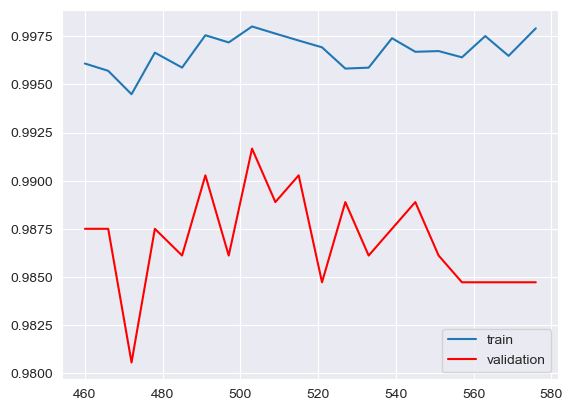

In [120]:
print(n2)
plt.plot(n2, train_score2.mean(axis=1), label="train")
plt.plot(n2, val_score2.mean(axis=1), label="validation", c='red')
plt.legend()
plt.show()

In [128]:
joblib.dump(best_model2, 'model2.pkl')
model2_loaded= joblib.load('model2.pkl')

In [129]:
predictions_mode2=best_model2.predict(x_test)
confusion_matrix(y_test, predictions_mode2)

array([[147,   0,   0],
       [  0, 164,   4],
       [  4,   5, 156]], dtype=int64)

#
 #                                       Model 3: svm
#

In [54]:
model3=svm.SVC()

model3_params={"kernel": ["poly", "rbf", "sigmoid"], 
              "degree": np.arange(2, 5), 
              "gamma":["scale"], 
              "cache_size":np.linspace(100, 400, 10)
              }
cv3=StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

model3_grid = GridSearchCV(model3, param_grid=model3_params, cv=cv3, scoring='accuracy')

In [55]:
model3_grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'cache_size': array([100.        , 133.33333333, 166.66666667, 200.        ,
       233.33333333, 266.66666667, 300.        , 333.33333333,
       366.66666667, 400.        ]),
                         'degree': array([2, 3, 4]), 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [57]:
model3_grid.score

<bound method BaseSearchCV.score of GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'cache_size': array([100.        , 133.33333333, 166.66666667, 200.        ,
       233.33333333, 266.66666667, 300.        , 333.33333333,
       366.66666667, 400.        ]),
                         'degree': array([2, 3, 4]), 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')>

In [59]:
best_model3= model3_grid.best_estimator_

In [60]:
best_model3.score(x_train, y_train)

0.9986111111111111

In [61]:
best_model3.score(x_test, y_test)

0.9854166666666667

In [73]:
n3, train_score3, val_score3= learning_curve(best_model3, x_train, y_train, cv=cv3, train_sizes=np.linspace(0.2, 1.0, 50))

In [71]:
predictions3=best_model3.predict(x_test)

[115 124 134 143 152 162 171 181 190 199 209 218 228 237 246 256 265 275
 284 293 303 312 322 331 340 350 359 369 378 387 397 406 416 425 434 444
 453 463 472 481 491 500 510 519 528 538 547 557 566 576]


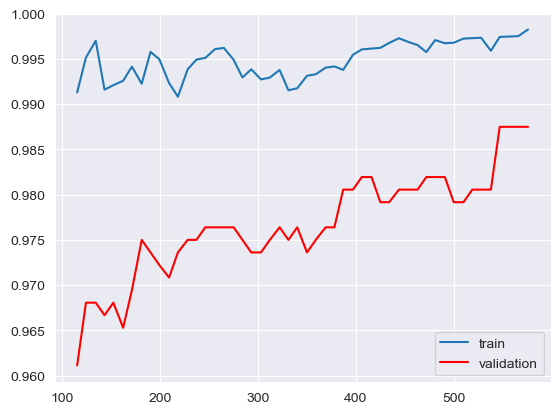

In [74]:
print(n3)
plt.plot(n3, train_score3.mean(axis=1), label="train")
plt.plot(n3, val_score3.mean(axis=1), label="validation", c='red')
plt.legend()
plt.show()

In [66]:
confusion_matrix(y_train, best_model3.predict(x_train))

array([[253,   0,   0],
       [  0, 231,   1],
       [  0,   0, 235]], dtype=int64)

In [69]:
confusion_matrix(y_test, predictions3)

array([[147,   0,   0],
       [  0, 166,   2],
       [  3,   2, 160]], dtype=int64)

In [105]:
# Save the model3 
import joblib
model3= joblib.load('model3.pkl')
model1=joblib.load('model1.pkl')
model2=joblib.load('model2.pkl')

#
 #                                     Models
#

In [125]:
model1.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='manhattan',
                     n_neighbors=1)>

In [126]:
model2.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(class_weight='balanced_subsample', min_samples_split=10,
                       n_estimators=31)>

In [127]:
model3.get_params

<bound method BaseEstimator.get_params of SVC(cache_size=100.0, degree=4, kernel='poly')>

# model4: xgboost

In [91]:
model4_params = {
    'n_estimators':np.arange(5, 15),
    'tree_method': ['approx'],
    'max_depth':[2, 3, 4, 5, 6], 
    'learning_rate': [0.1, 0.2, 0.05, 0.01]
}
num_boost_round = 10
cv=StratifiedKFold(5)
model4 = xgb.XGBClassifier(objective= 'multi:softprob')
model4_grid=GridSearchCV(model4, param_grid=model4_params, cv=cv, scoring='accuracy')

In [92]:
model4_grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.05, 0.01],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'tree_method': ['approx']},
             scoring='accuracy')

In [93]:
model4_grid.best_params_

{'learning_rate': 0.2,
 'max_depth': 6,
 'n_estimators': 10,
 'tree_method': 'approx'}

In [96]:
best_model4=model4_grid.best_estimator_

In [98]:
best_mode4.score(x_train, y_train)

1.0

In [99]:
best_model4.score(x_test, y_test)

0.9916666666666667

In [101]:
n4, train_score4, val_score4= learning_curve(best_model4, x_train, y_train, cv=cv, train_sizes=np.linspace(0.2, 1.0, 50))

[153 166 178 191 203 216 228 241 253 266 278 291 304 316 329 341 354 366
 379 391 404 416 429 441 454 467 479 492 504 517 529 542 554 567 579 592
 604 617 630 642 655 667 680 692 705 717 730 742 755 768]


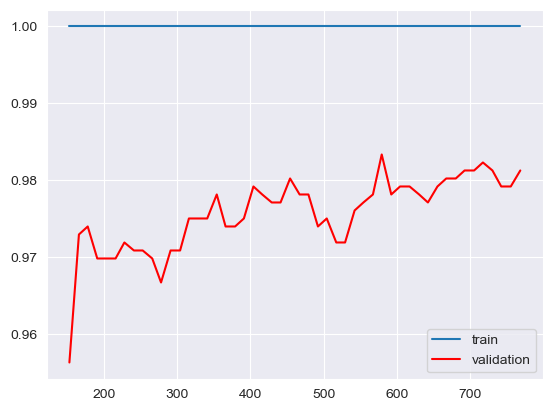

In [102]:
print(n4)
plt.plot(n4, train_score4.mean(axis=1), label="train")
plt.plot(n4, val_score4.mean(axis=1), label="validation", c='red')
plt.legend()
plt.show()

In [103]:
predictions4=best_model4.predict(x_test)

In [104]:
confusion_matrix(y_test, predictions4)

array([[82,  0,  0],
       [ 0, 72,  1],
       [ 0,  1, 84]], dtype=int64)

In [106]:
joblib.dump(best_model4, 'model4.pkl')

['model4.pkl']